## Network Science Assignment 4 (HS22)

David Diener 19-733-179

Rafael Dubach 18-755-180

In [2]:
import math as m
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from typing import Tuple, List, Dict
from networkx.algorithms.community import modularity
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.generators.random_graphs import gnm_random_graph
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import binomial_graph
from networkx.algorithms.cluster import average_clustering
from networkx import is_connected, connected_components, watts_strogatz_graph,average_shortest_path_length


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
graphs = {}
graphs_random = {}
graphs['Dolphins'] = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_4/graph_dolphins.gml")
graphs['Jazz'] = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_4/graph_jazz_collab.gml")
graphs['Karate'] = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_4/graph_karate.gml")

for key, graph in graphs.items():
    graphs_random[key] = random_reference(graph, connectivity=False)

## A04.1 Community detection

**Task:**
For the given networks find the communities using (a) the greedy modularity maximization by Clauset Newman and Moore and (b) the Girvan-Newman algorithm. Assign
to each community a color and draw the resulting graph.

**Task:**
Randomise each network and compare the number
of communities obtained before and after randomisation.

In [4]:
from networkx.drawing import nx_agraph
import matplotlib.cm as cm
final_gs = {}
def plot_g(name, data,g):
    data_size = len(data)
    #from stackoverflow
    colour_spectrum = cm.rainbow(np.linspace(0, 1, data_size))
    count = 0
    for community in data:
        for node in community:
            g.nodes[node]['colour'] = colour_spectrum[count]
        count += 1
    plt.figure(figsize=(25, 13))
    ax = plt.gca()
    ax.set_title(name)
    colours = [g.nodes[node]['colour'] for node in g]
    nx.draw(g, node_color=colours)

Dolphins
a) greedy normal (Dolphins): 4 	 greedy random (Dolphins): 5 

b) girvan newam normal (Dolphins): 5 	 girvan newam random (Dolphins): 23
-------------------------------------------------------------------
Jazz
a) greedy normal (Jazz): 4 	 greedy random (Jazz): 5 

b) girvan newam normal (Jazz): 39 	 girvan newam random (Jazz): 128
-------------------------------------------------------------------
Karate
a) greedy normal (Karate): 3 	 greedy random (Karate): 4 

b) girvan newam normal (Karate): 5 	 girvan newam random (Karate): 5
-------------------------------------------------------------------


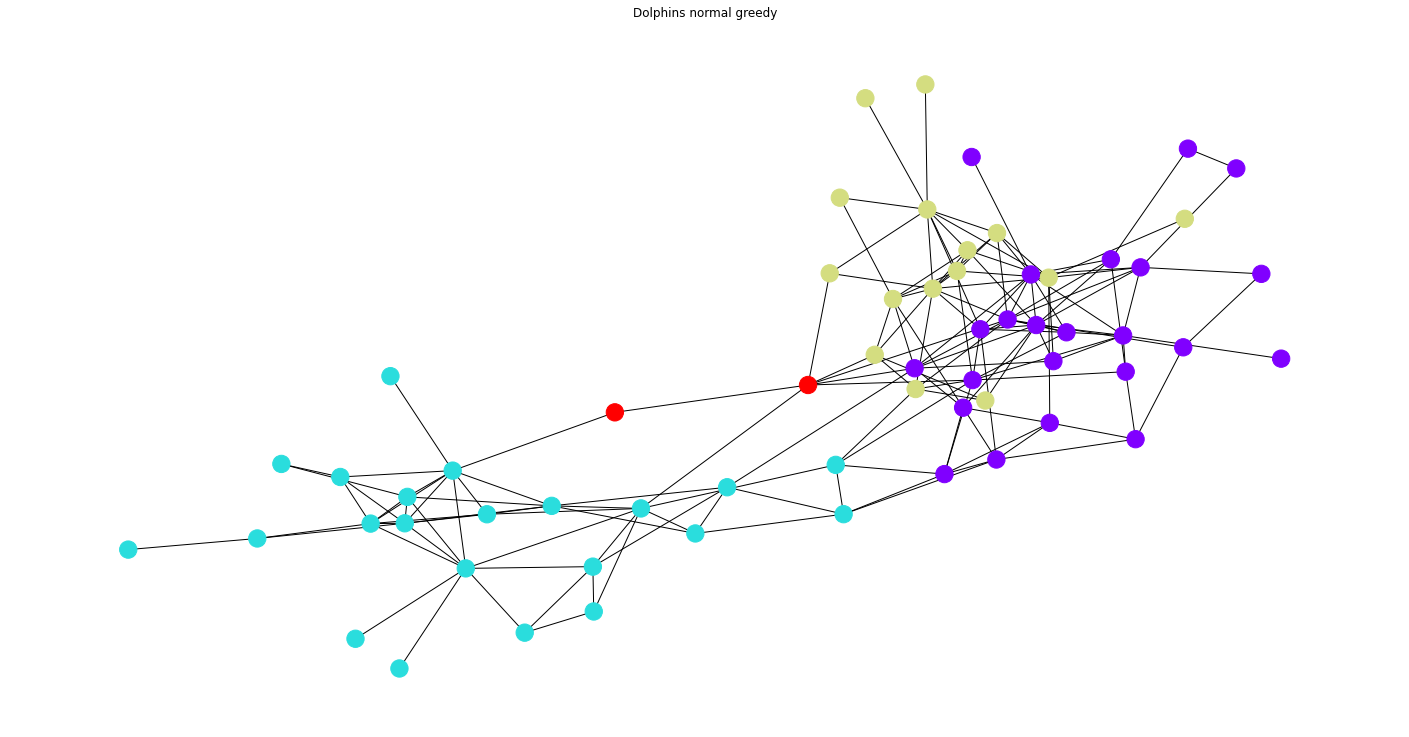

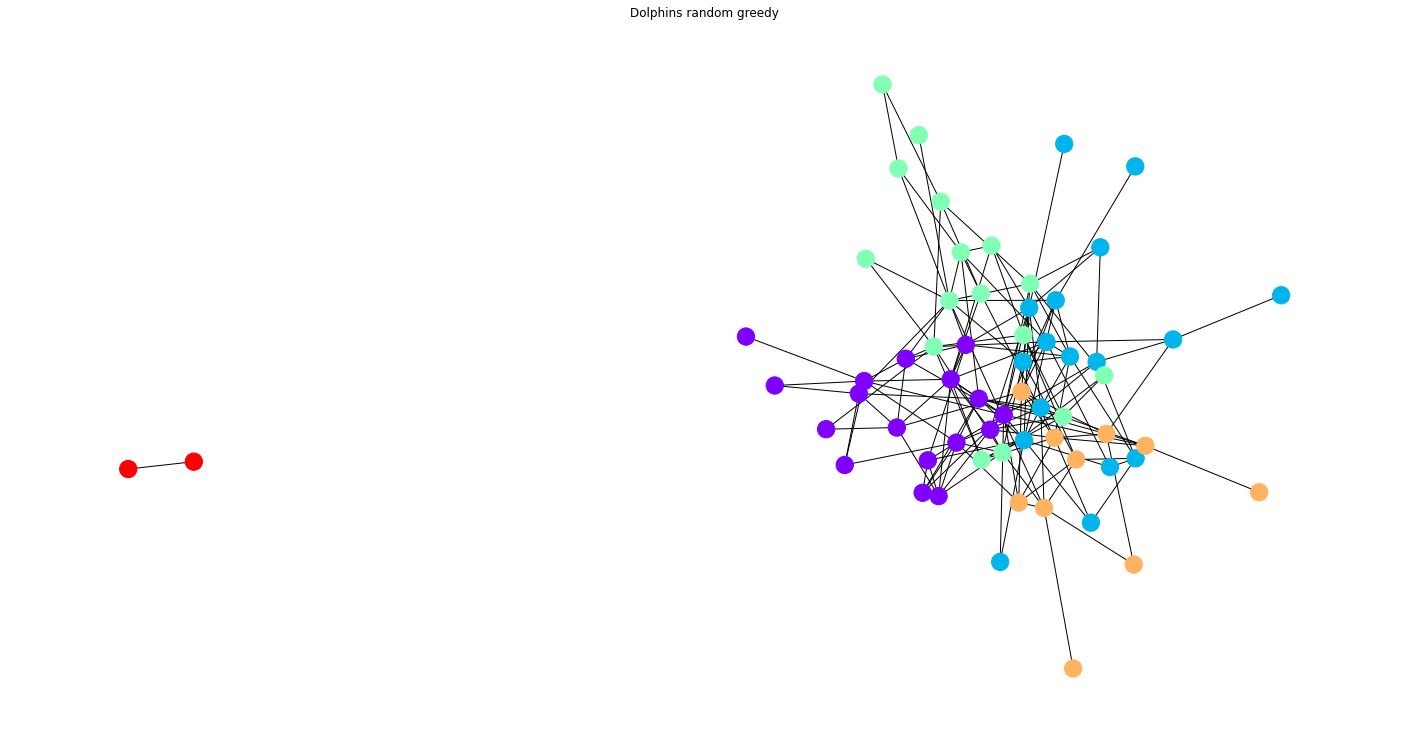

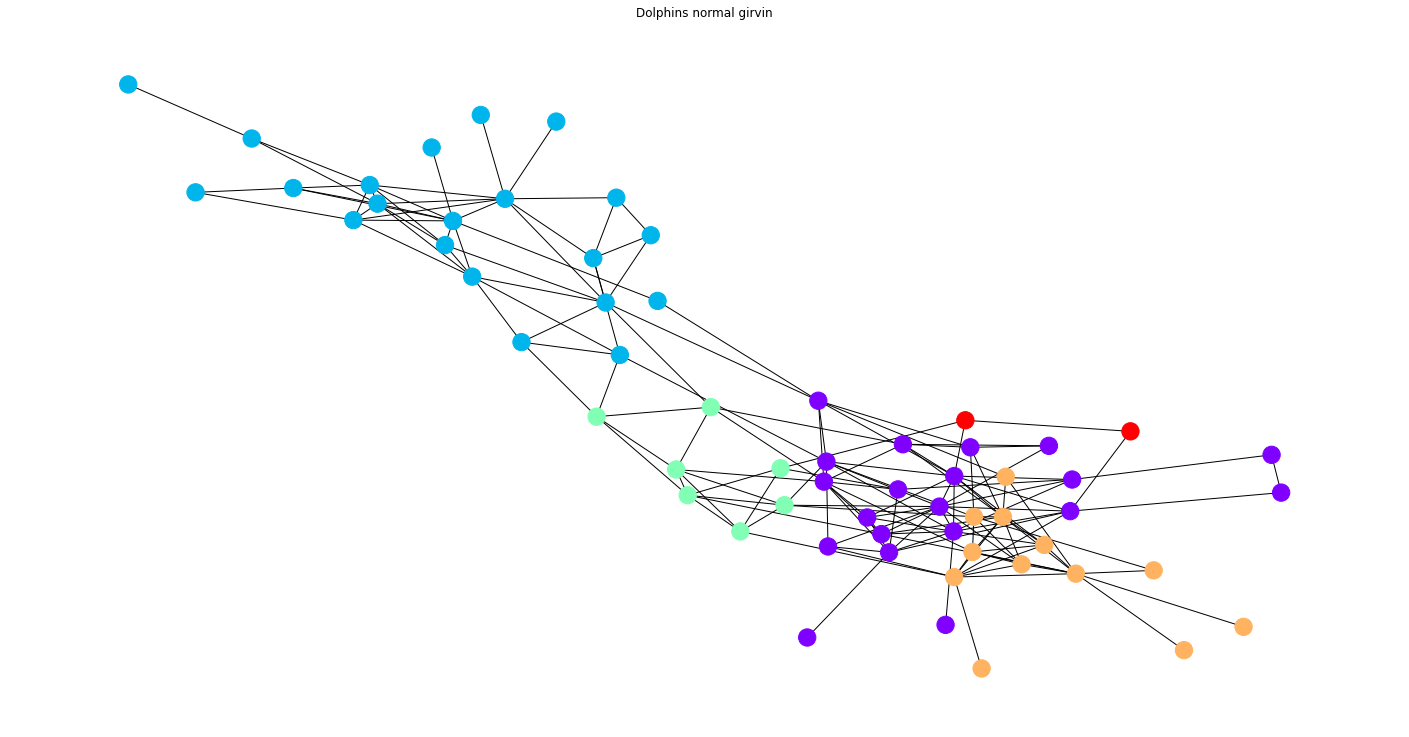

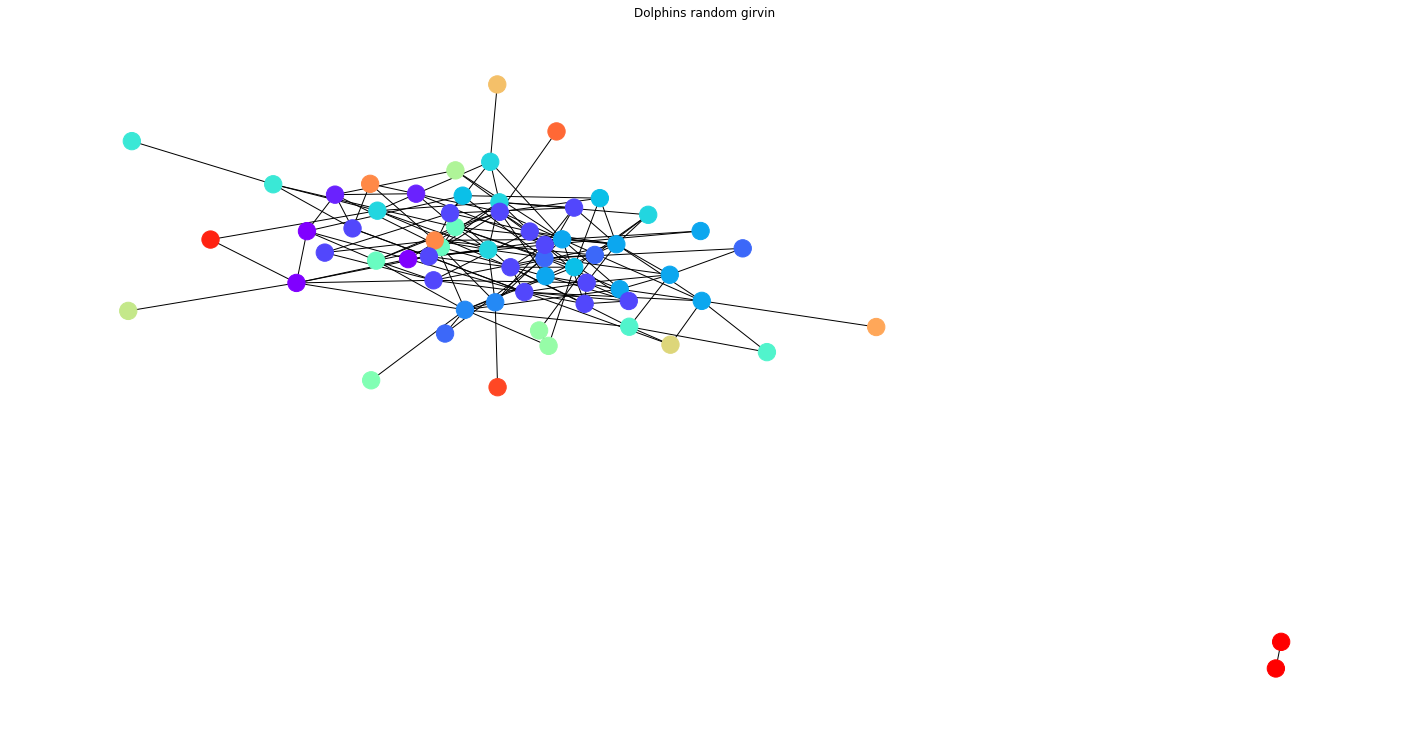

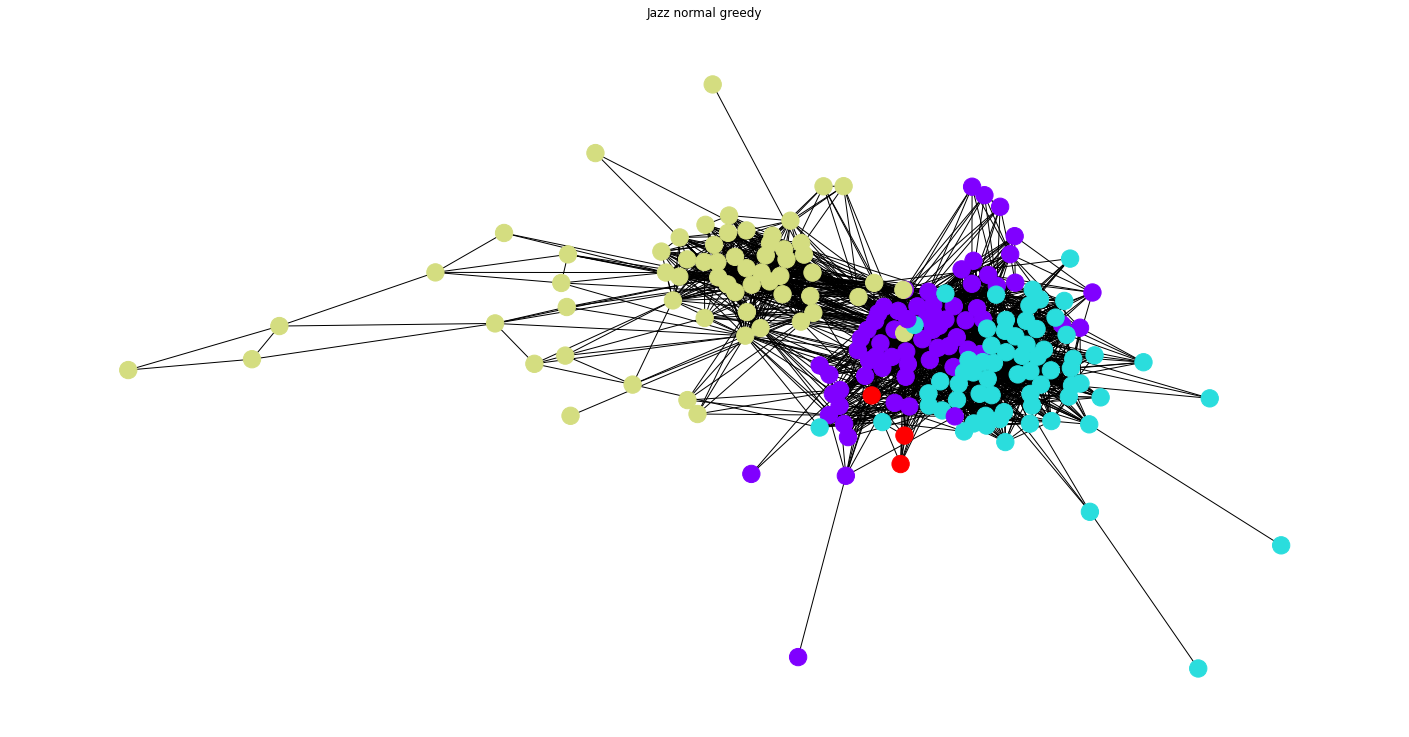

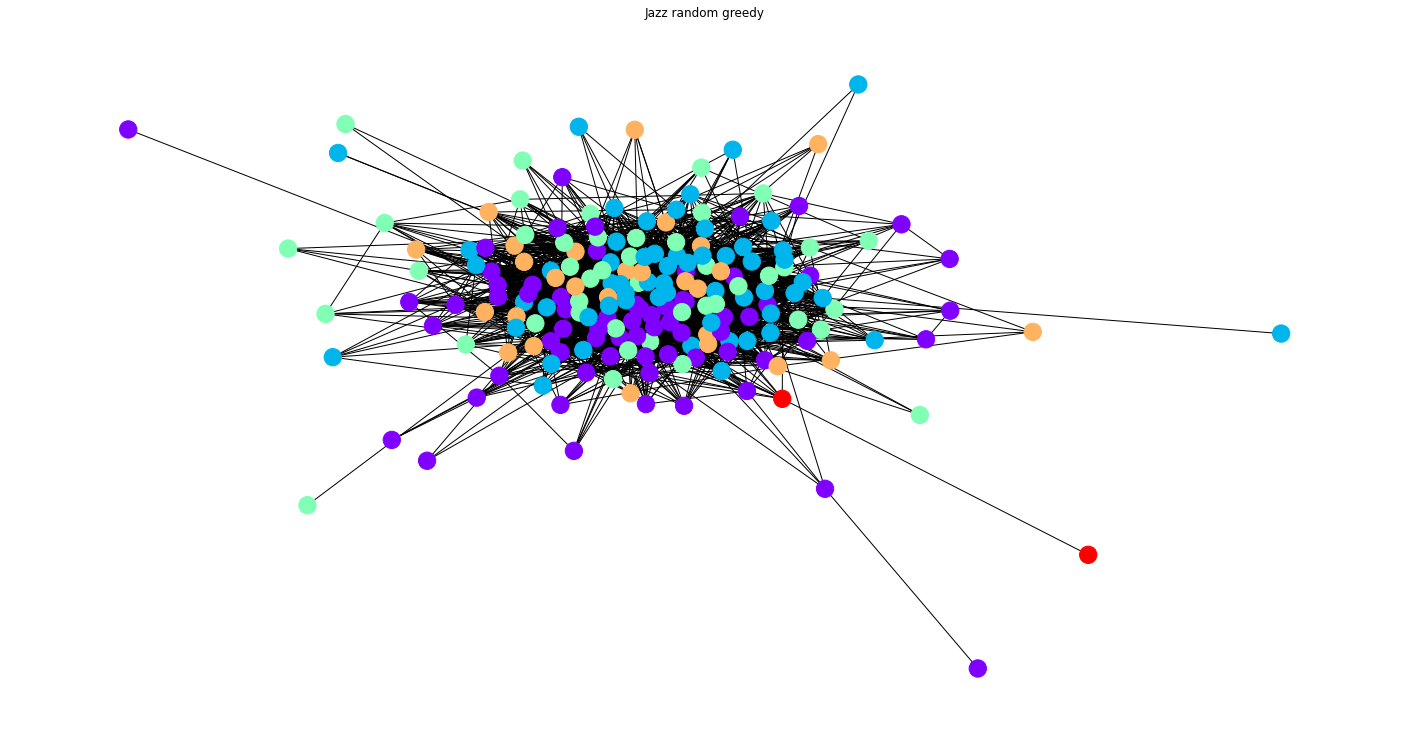

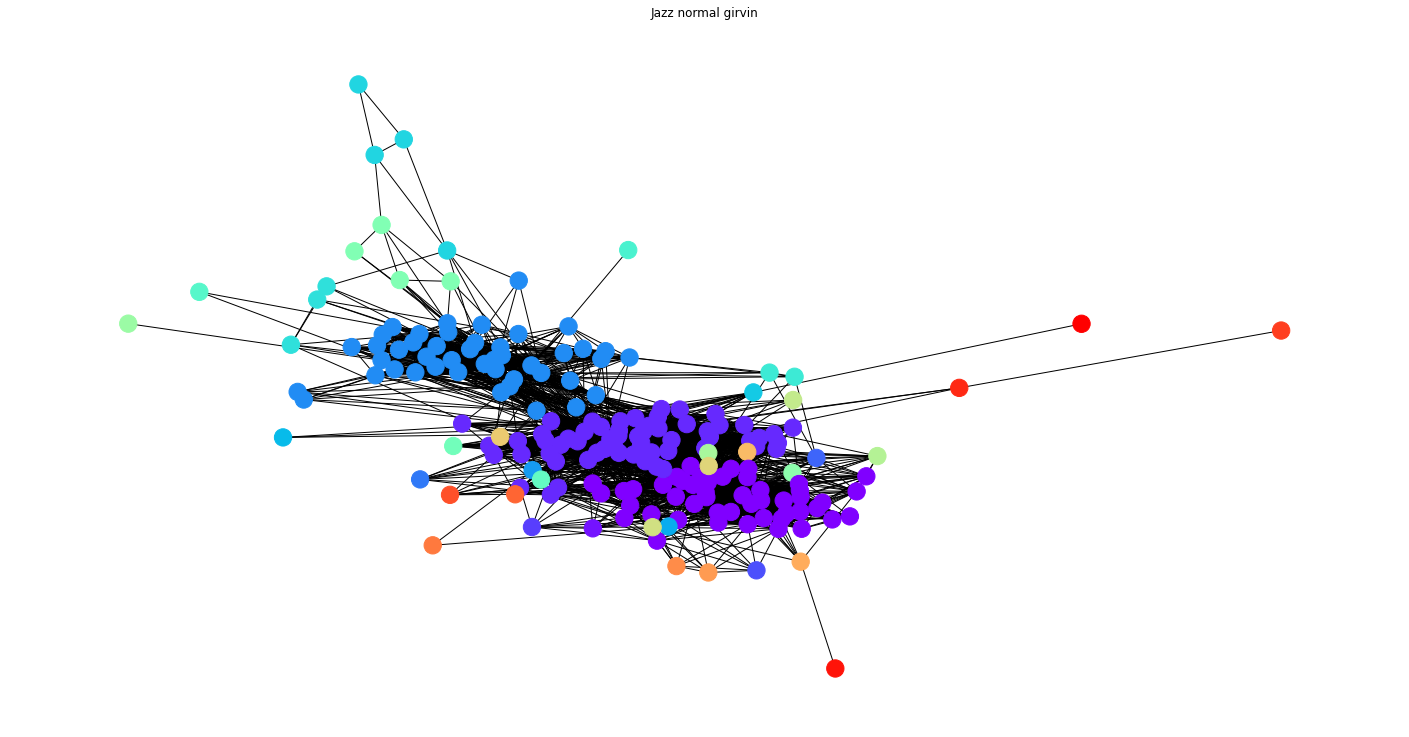

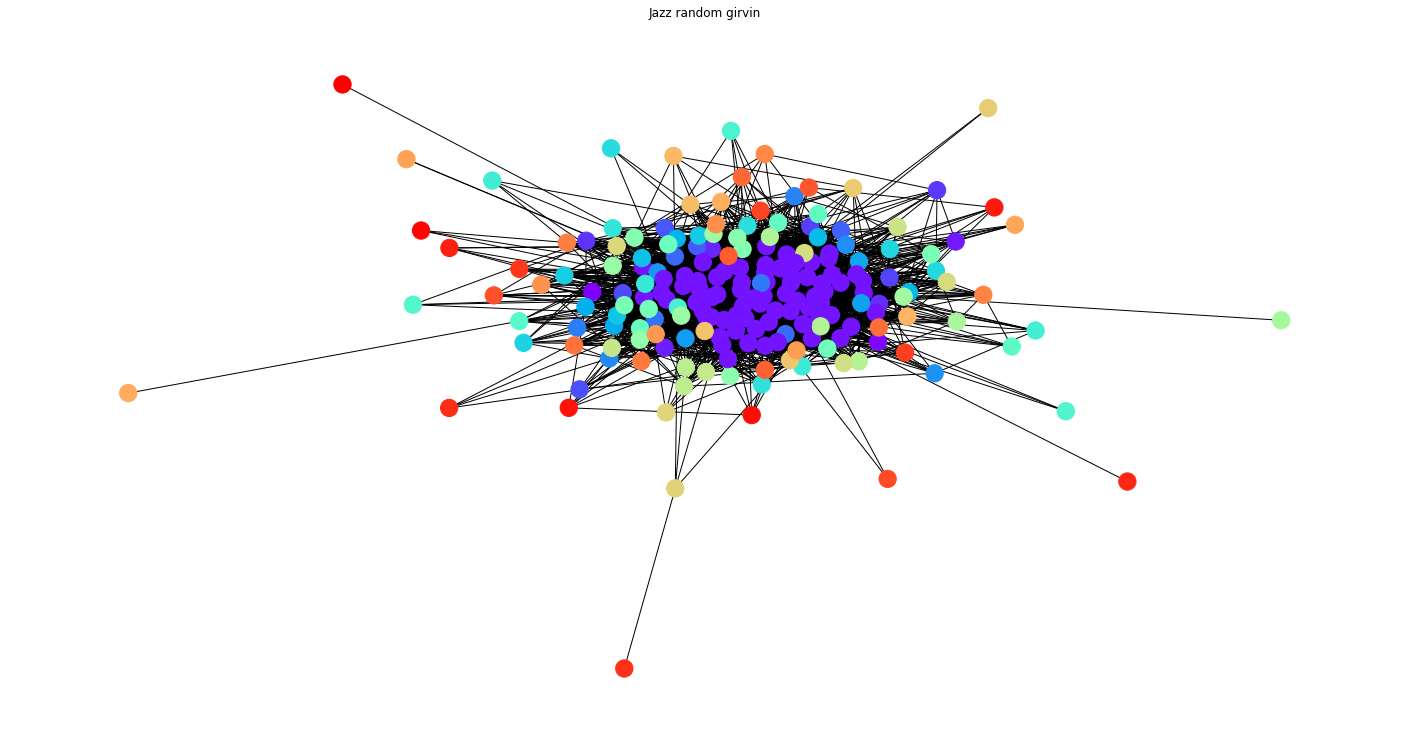

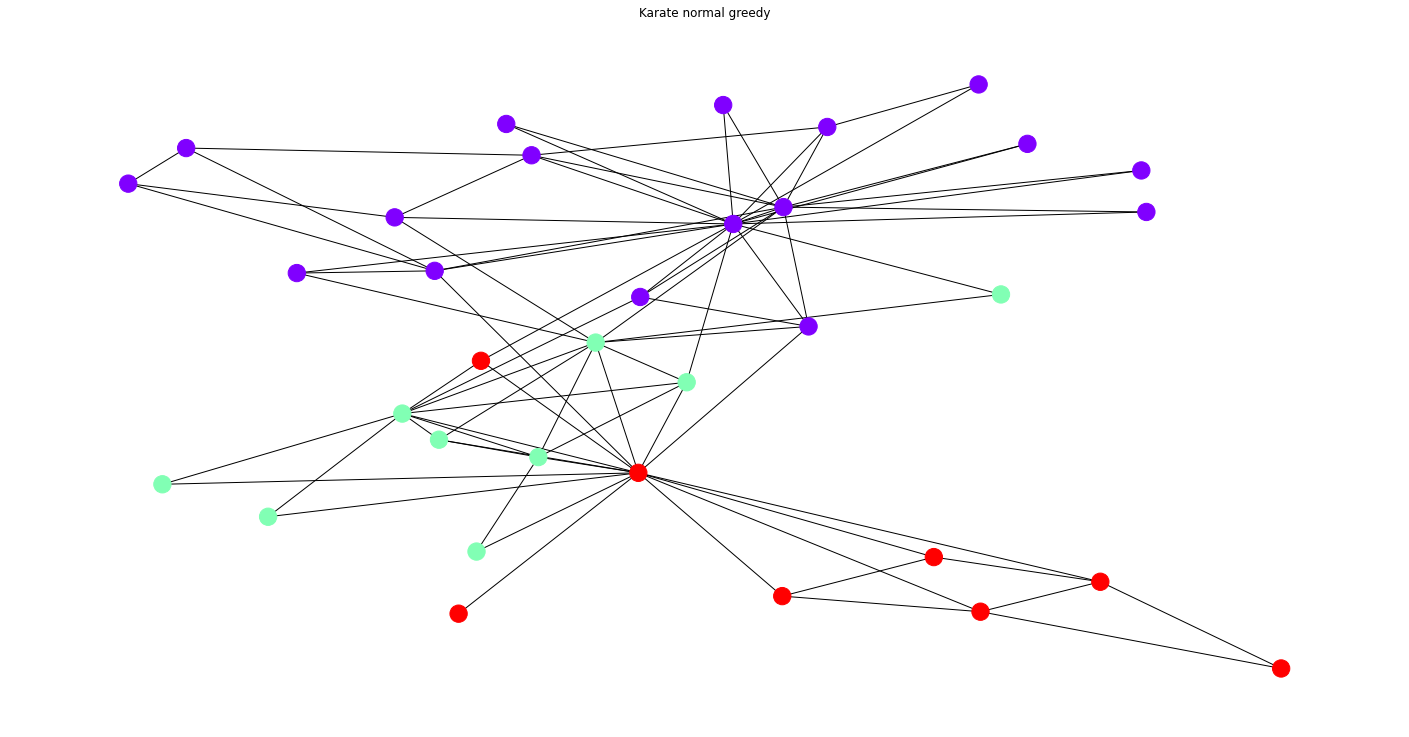

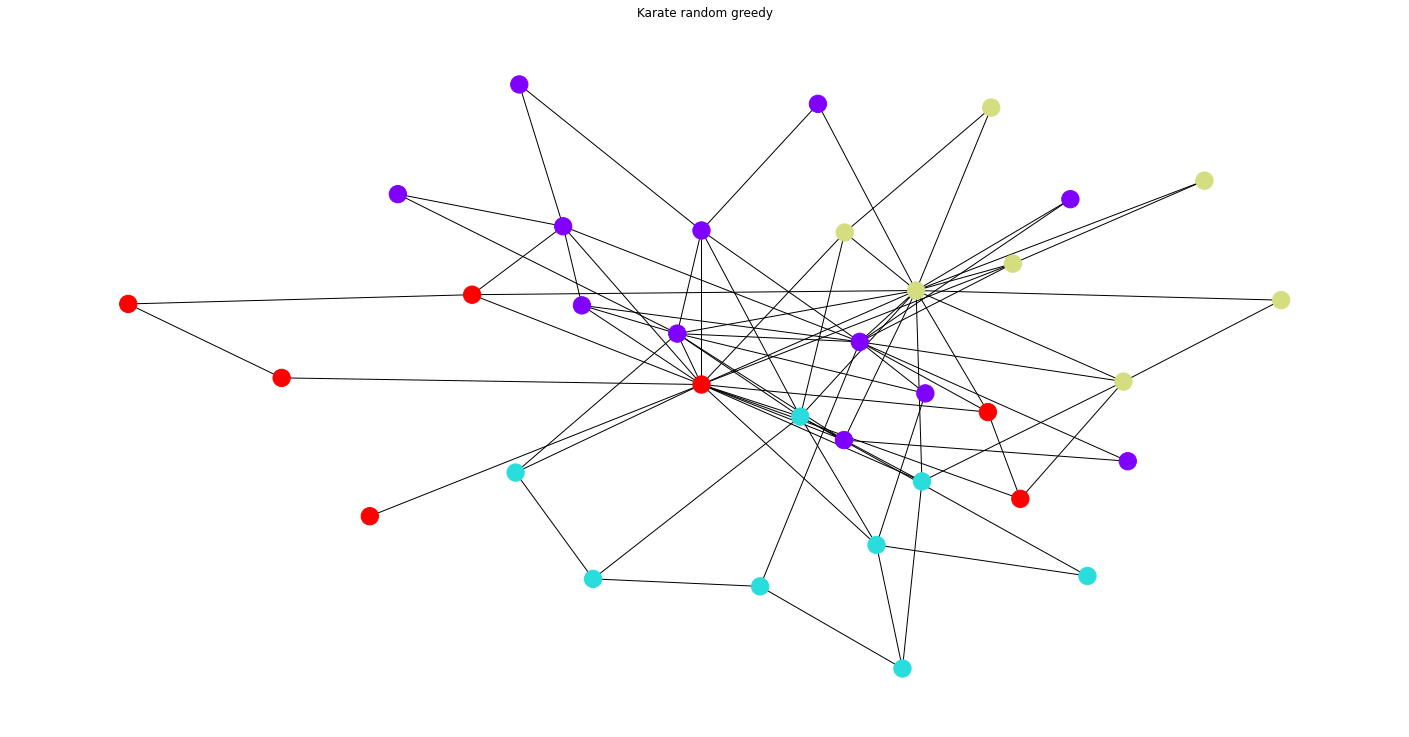

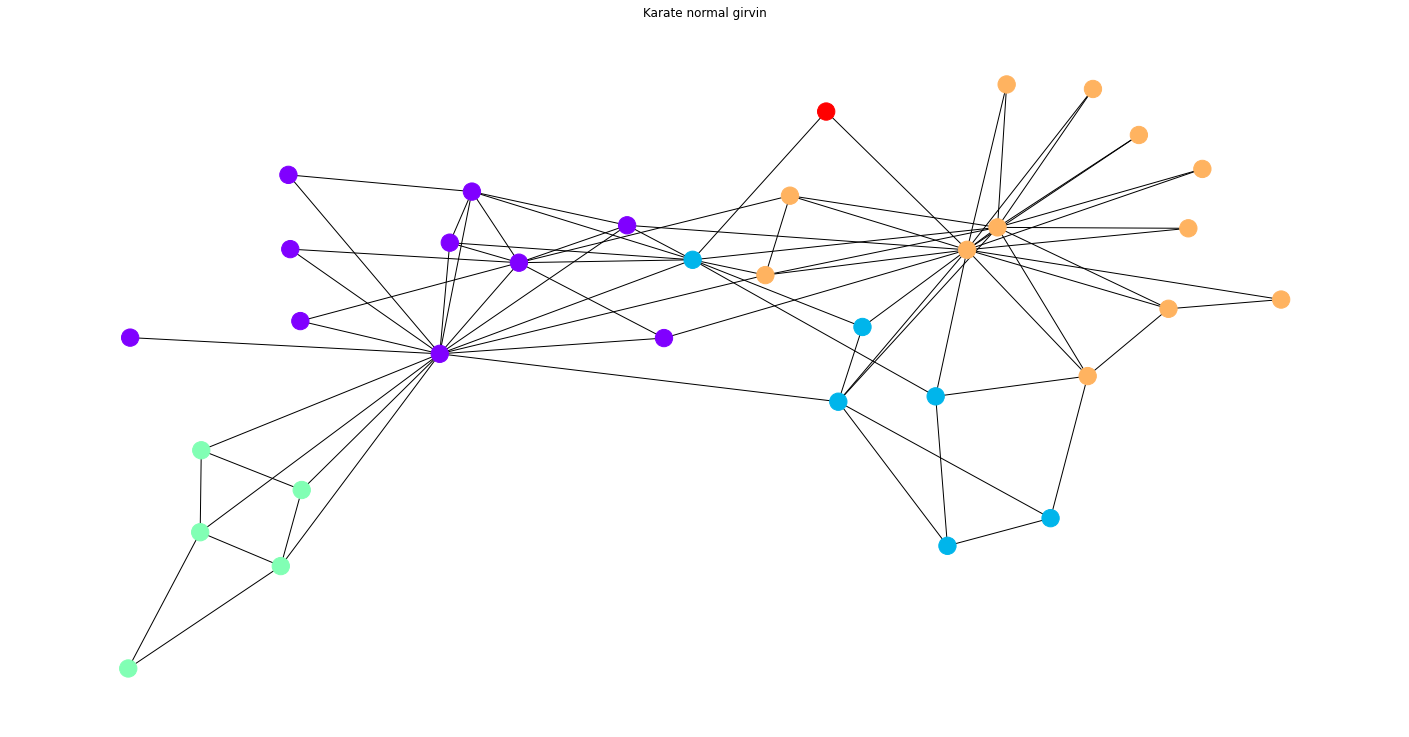

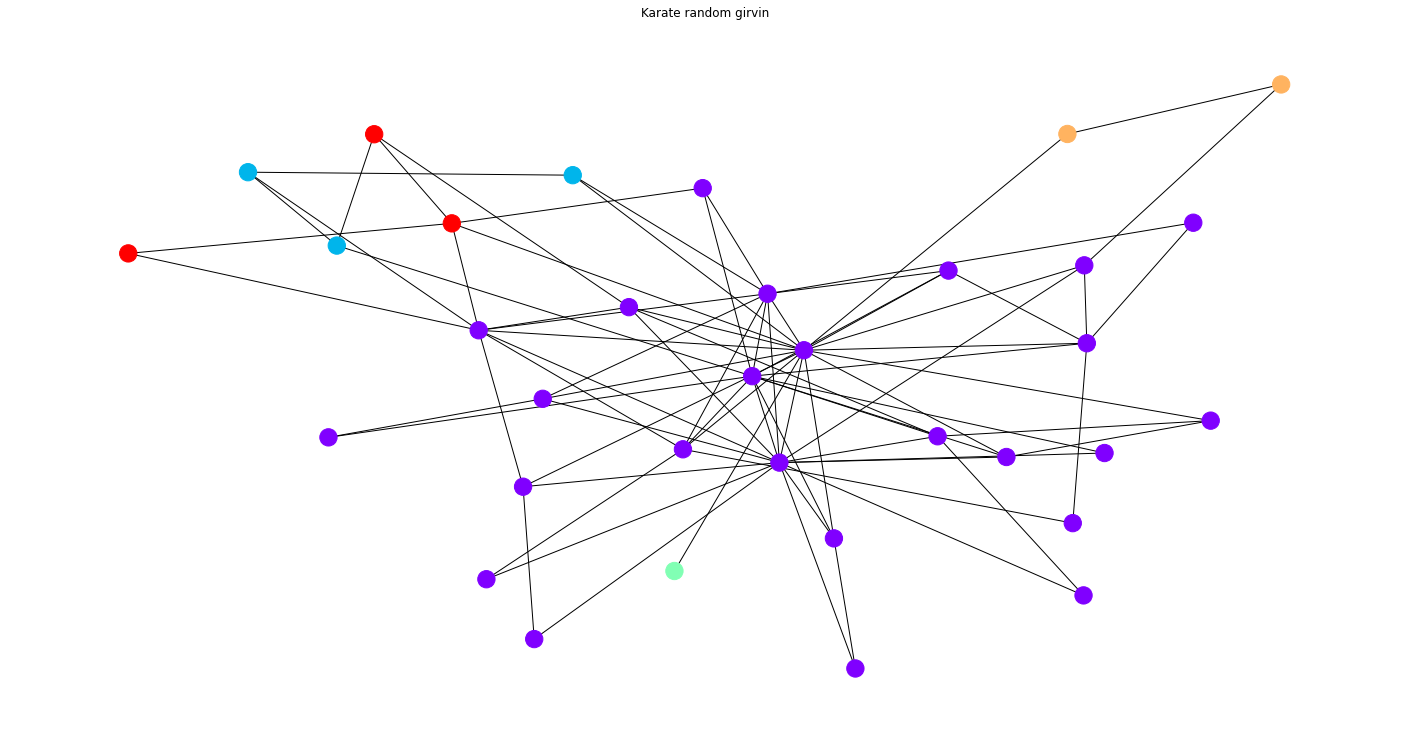

In [14]:
def greedy_girvin_newman_plot():
  # Watch out: 10 min runtime
  for (k_n,v_n), (k_r,v_r) in zip(graphs.items(), graphs_random.items()):
    greedy_n, greedy_r = greedy_modularity_communities(v_n), greedy_modularity_communities(v_r)
    girvan_newam_n, girvan_newam_r = girvan_newman(v_n), girvan_newman(v_r)

    girvan_newam_n = list(girvan_newam_n)
    girvan_newam_r = list(girvan_newam_r)


    modularity_n = max([modularity(v_n, el) for el in girvan_newam_n])
    modularity_r = max([modularity(v_r, el) for el in girvan_newam_r])

    max_dic_n = {modularity(v_n, el): el for el in girvan_newam_n}
    max_dic_r = {modularity(v_r, el): el for el in girvan_newam_r}

    max_mod_com_n = max_dic_n[max(k for k, v in max_dic_n.items())]
    max_mod_com_r = max_dic_r[max(k for k, v in max_dic_r.items())]

    print(k_n)
    print(f"a) greedy normal ({k_n}): {len(greedy_n)} \t greedy random ({k_r}): {len(greedy_r)} \n")
    print(f"b) girvan newam normal ({k_n}): {len(max_mod_com_n)} \t girvan newam random ({k_r}): {len(max_mod_com_r)}")
    print("-------------------------------------------------------------------")

    # plot normal greedy
    plot_g(k_n+" normal greedy", greedy_n,v_n)
    # plot random greedy
    plot_g(k_n+" random greedy", greedy_r,v_r)
    # plot normal girvin
    plot_g(k_n+" normal girvin", max_mod_com_n,v_n)
    # plot random girvin
    plot_g(k_n+" random girvin", max_mod_com_r,v_r)

greedy_girvin_newman_plot()





## A04.2 Erdos-Renyi random networks

**Task:**
Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a) ⟨𝑘⟩ = 0.3, (b) ⟨𝑘⟩ = 1 and (c)
⟨𝑘⟩ = 2.5. Visualize these networks.

**Task:**
Generate ER graphs with 𝑁 = 200 nodes for different
edge creation probabilities 𝑝 ∈ [0, 1] and:

1. Plot the average fraction of nodes in the largest connected component ⟨𝑁𝐺/𝑁⟩ as a function of 𝑝 and mark with a vertical line the critical probability 𝑝𝑐 = 1/𝑁
2. Plot the average clustering⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result

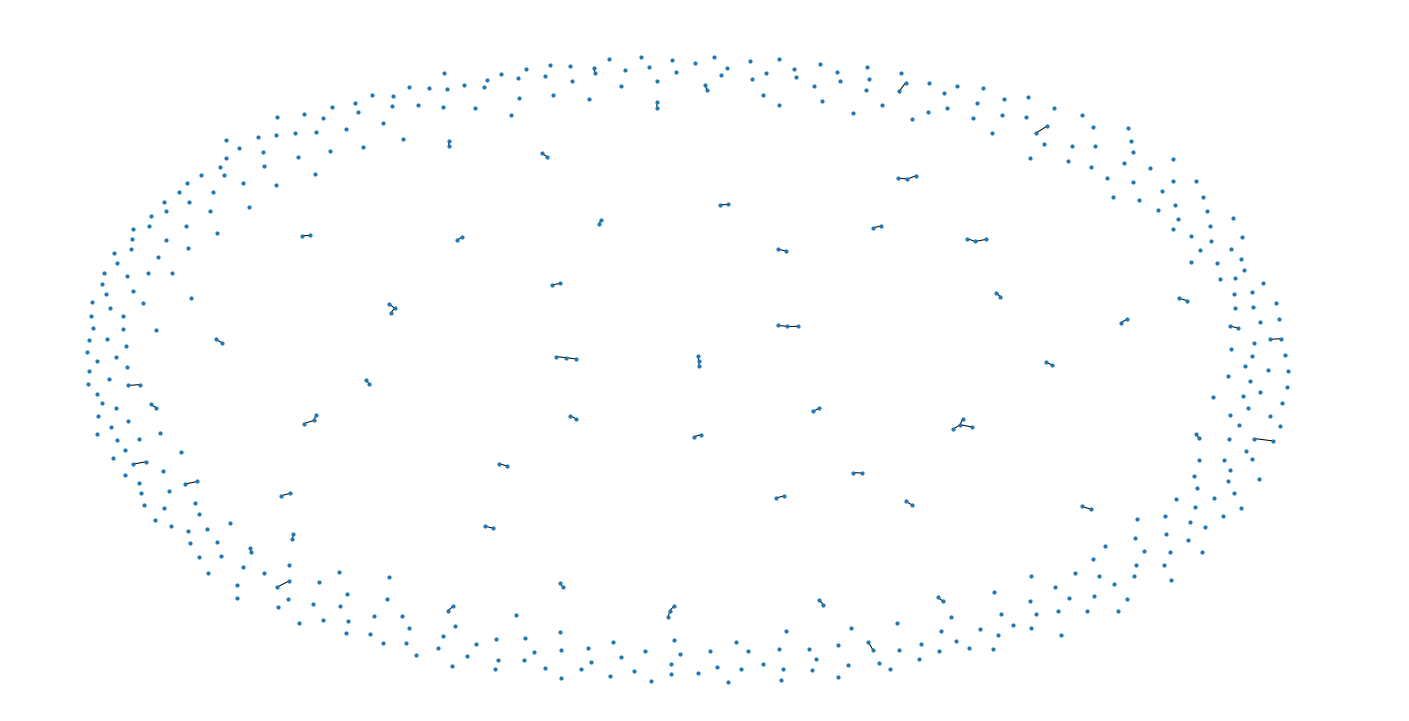

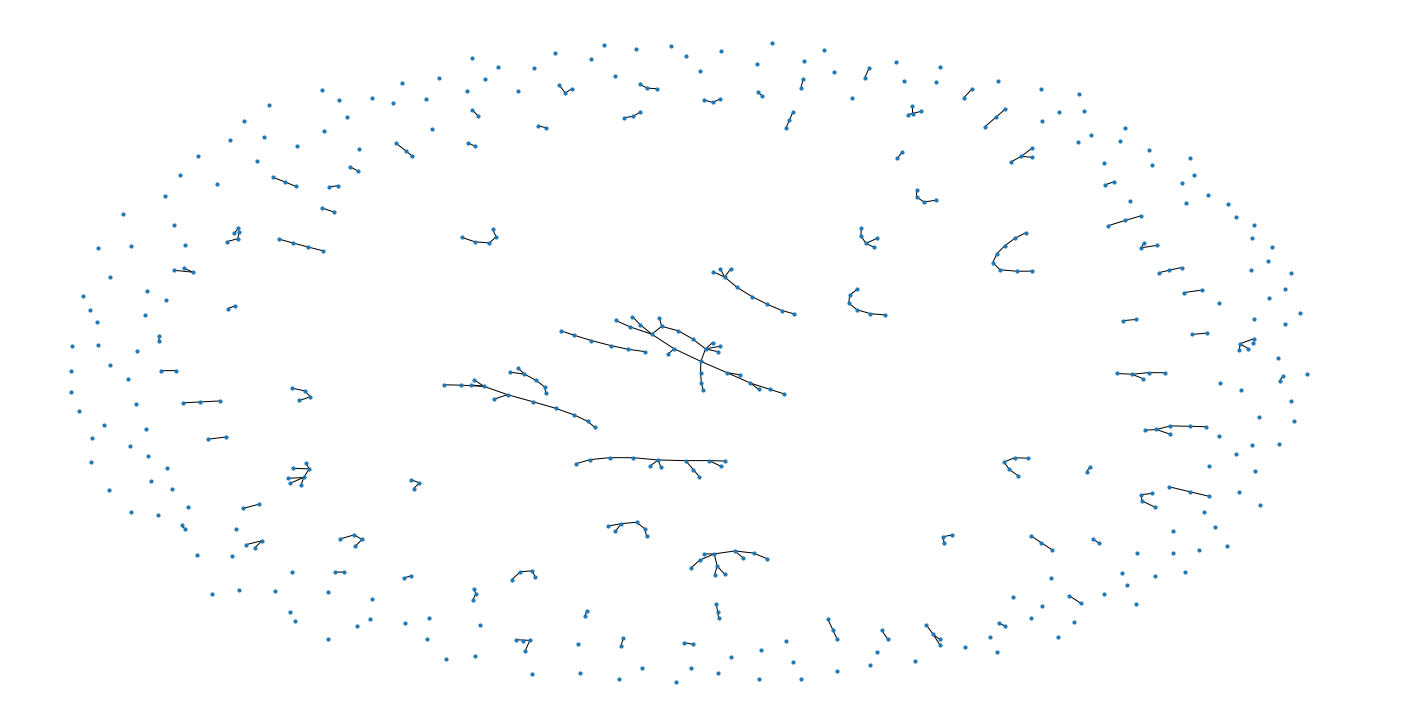

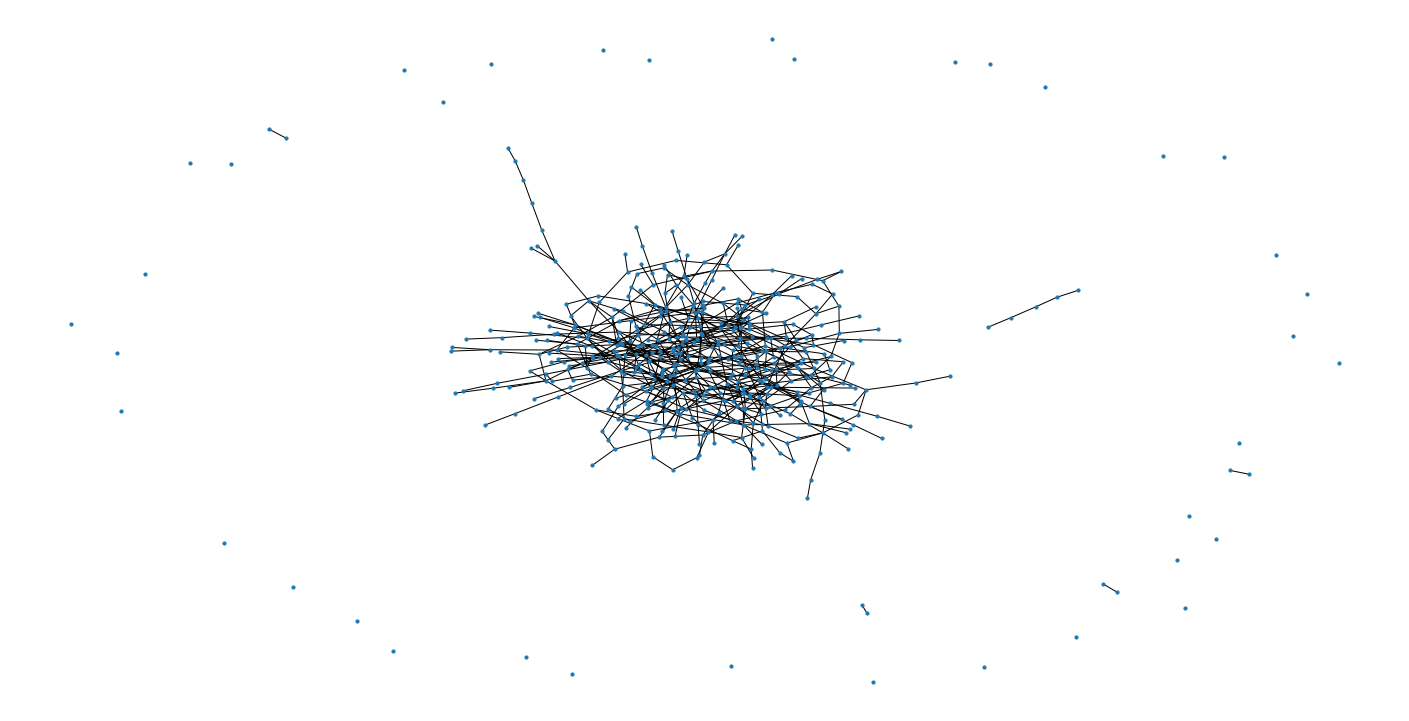

In [ ]:
# as discussed in the lab on the 10.19.22
degree =[0.3,1,2.5]
for deg in degree:
  fig, ax = plt.subplots(figsize=(25, 13))
  px = nx.erdos_renyi_graph(500,deg/500)
  #print(sum(dict(px.degree).values())/500)
  pos = nx.spring_layout(px)
  nx.draw(px, pos = pos, node_size=10)



In [8]:
def p_connected(graph):
    if(is_connected(graph)):
        return 1
    largest_component = sorted(connected_components(graph), key=len, reverse=True)[0]
    return len(largest_component) / graph.number_of_nodes()

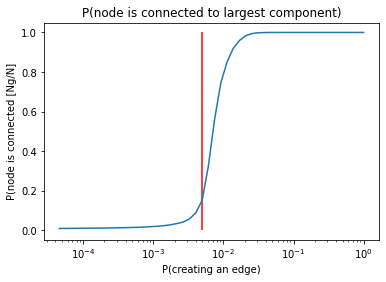

In [9]:
N = 200
space = np.logspace(-10,0,base=np.e)
probabilities, clusters = [], []

def p_node_connected():
  for p in space:
      probability_list, cluster_list = [], []
      for i in range(N):
          erdos = erdos_renyi_graph(N,p)
          probability_list.append(p_connected(erdos))
          cluster_list.append(average_clustering(erdos))
      probabilities.append(np.mean(probability_list))
      clusters.append(np.mean(cluster_list))

  plt.plot(space, probabilities)
  plt.xlabel("P(creating an edge)")
  plt.ylabel("P(node is connected [Ng/N]")
  plt.title("P(node is connected to largest component)")
  plt.xscale("log")
  plt.vlines(1/N,ymin=0,ymax=1, color="red")
  plt.show()

p_node_connected()

The red line is describes the critical probability p(c) = 1/N


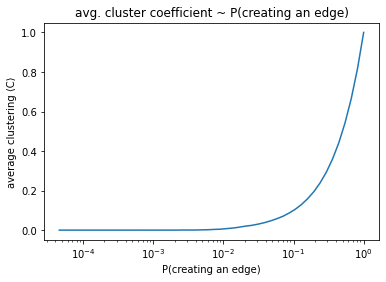

In [10]:
plt.plot(space, clusters)
plt.xlabel("P(creating an edge)")
plt.ylabel("average clustering ⟨C⟩")
plt.xscale("log")
plt.yscale("linear")
plt.title("avg. cluster coefficient ~ P(creating an edge)")

plt.show()

The average clustering determines the likelihood that two nodes have common neighbors. Links between nodes in Erdos-Renyi graphs are equally likely to exist. With increasing probability the average clustering will grow as well.

## A04.3 Small-world with high clustering

Task: Generate many WS small-world networks with 𝑁 = 150 nodes and fixed number of neighbors for each
node 2𝜅 = 12. As a function of the rewiring probability 𝑝,
using both linear and logarithmic scale for the 𝑝-axis:

1. Plot the average clustering ⟨𝐶(𝑝)⟩/⟨𝐶(0)⟩and check if it correctly reproduces the analytical result

2. Plot the average shortest-path length 𝐷(𝑝)/𝐷(0)

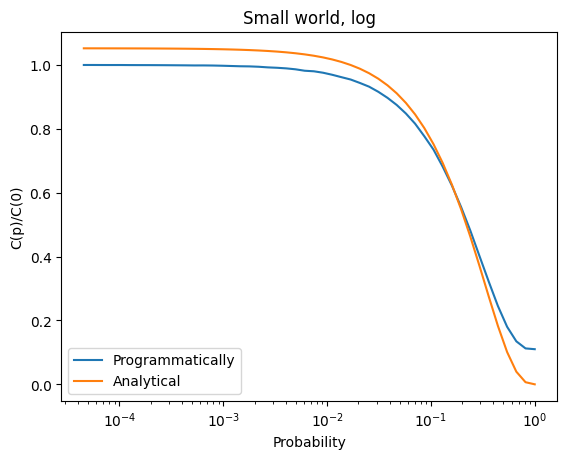

In [3]:
def cal_Cp(p, k):
    return 1.5*((k-1)/(2*k-1))*(1-p)**3

n, k, t  = 150, 12, 150
CS, C_calculated, path_length = [], [], []
# Cal watts with p=0
watts_p0 = watts_strogatz_graph(n,k,0)
c0 = average_clustering(watts_p0)
path_p0 = average_shortest_path_length(watts_p0)

probabilities = np.logspace(-10,0,base=np.e)

for p in probabilities:
    CS_t, C_calculated_t, path_length_t = [], [], []
    for trial in range(t):
        wsg = watts_strogatz_graph(n,k,p)
        C_calculated_t.append(cal_Cp(p,k)/c0)
        CS_t.append(average_clustering(wsg)/c0)
        path_length_t.append(average_shortest_path_length(wsg)/path_p0)
    CS.append(np.mean(CS_t))
    C_calculated.append(np.mean(C_calculated_t))
    path_length.append(np.mean(path_length_t))

plt.plot(probabilities, CS, label="Programmatically")
plt.plot(probabilities, C_calculated, label="Analytical")
plt.xlabel("Probability")
plt.ylabel("C(p)/C(0)")
plt.title("Small world, log")
plt.xscale("log")
plt.legend()
plt.show()

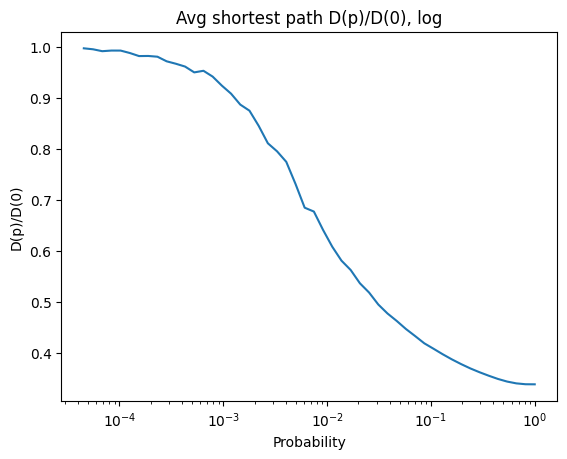

In [4]:
plt.plot(probabilities, path_length)
plt.xlabel("Probability")
plt.ylabel("D(p)/D(0)")
plt.title("Avg shortest path D(p)/D(0), log")
plt.xscale("log")
plt.show()

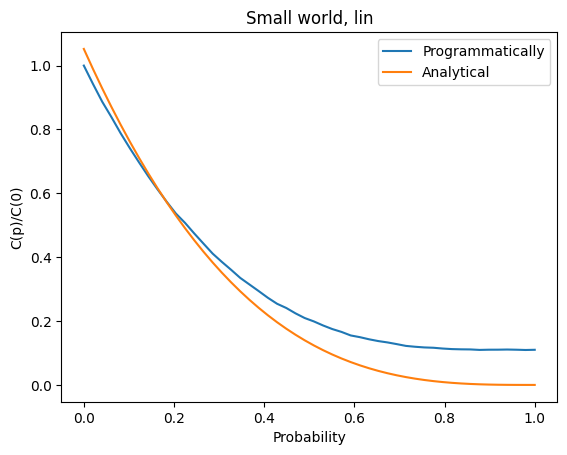

In [5]:
def cal_Cp(p, k):
    return 1.5*((k-1)/(2*k-1))*(1-p)**3

n, k, t  = 150, 12, 150
CS, C_calculated, path_length = [], [], []
# Cal watts with p=0
watts_p0 = watts_strogatz_graph(n,k,0)
c0 = average_clustering(watts_p0)
path_p0 = average_shortest_path_length(watts_p0)

probabilities = np.linspace(0,1)

for p in probabilities:
    CS_t, C_calculated_t, path_length_t = [], [], []
    for trial in range(t):
        wsg = watts_strogatz_graph(n,k,p)
        C_calculated_t.append(cal_Cp(p,k)/c0)
        CS_t.append(average_clustering(wsg)/c0)
        path_length_t.append(average_shortest_path_length(wsg)/path_p0)
    CS.append(np.mean(CS_t))
    C_calculated.append(np.mean(C_calculated_t))
    path_length.append(np.mean(path_length_t))

plt.plot(probabilities, CS, label="Programmatically")
plt.plot(probabilities, C_calculated, label="Analytical")
plt.xlabel("Probability")
plt.ylabel("C(p)/C(0)")
plt.title("Small world, lin")
plt.xscale("linear")
plt.legend()
plt.show()




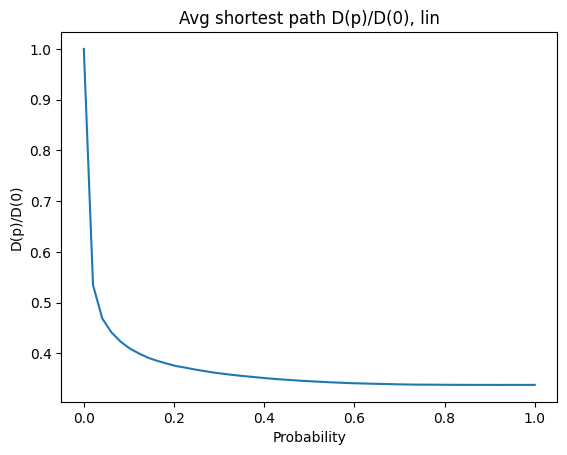

In [6]:
plt.plot(probabilities, path_length)
plt.xlabel("Probability")
plt.ylabel("D(p)/D(0)")
plt.title("Avg shortest path D(p)/D(0), lin")
plt.xscale("linear")
plt.show()